In [1]:
import pandas as pd
import numpy as np
import nltk
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import RandomOverSampler
from joblib import dump, load
import pickle

In [2]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [3]:

from imblearn.under_sampling import NearMiss

In [4]:
data = pd.read_excel("1000 leads.xlsx")

In [5]:
data.head()

,Lead Name,Location,Status,Status information,Unnamed: 4
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",NaN
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",NaN
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,NaN
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,NaN
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",NaN


In [6]:
data.columns

Index(['Lead Name', 'Location', 'Status ', 'Status information', 'Unnamed: 4'], dtype='object')

In [7]:
data.drop(['Lead Name', 'Location','Unnamed: 4'],axis=1, inplace=True)

In [8]:
data.head()

,Status,Status information
0,Not Converted,"14/8/prema: share me details, available in evn..."
1,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Converted,16|AuG|moHan:rnr
3,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [9]:
data.info

<bound method DataFrame.info of             Status                                  Status information
0     Not Converted  14/8/prema: share me details, available in evn...
1     Not Converted  14/8/prema: cal me tmrw, shared details to ema...
2        Converted                                    16|AuG|moHan:rnr
3     Not Converted  14/8/17(Surendra):i want only Server 16|AuG|mo...
4     Not Converted  14/8/prema:rnr 16/8/prema: gave info, he said ...
...             ...                                                ...
996   Not Converted  25/4/17(Surendra):please send me details tomor...
997   Not Converted  24/4/17(prema): need CT, but our venue is far....
998   Not Converted  24/Apr/moHan:intrstd in evng batch trail perd ...
999   Not Converted  1/5/17(Surendra):please share me details 11/5/...
1000  Not Converted  24/4/17(prema): shared details need only Cert....

[1001 rows x 2 columns]>

In [10]:
data.describe().transpose()

,count,unique,top,freq
Status,998,4,Not Converted,856
Status information,977,969,mail shared,3


In [11]:
data['Status ']= data['Status '].replace(['Conveted'],'Converted ')

In [12]:
data['Status '].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', nan], dtype=object)

In [13]:
count=data.isnull().sum().sort_values(ascending = False)
percentage=((data.isnull().sum()/len(data)*100)).sort_values(ascending = False)
missing_data = pd.concat([count,percentage],axis =1, keys=['count','percentage'])
missing_data

,count,percentage
Status information,24,2.397602
Status,3,0.299700


In [14]:
data_new=data.dropna()

In [15]:
data_new.isnull().sum().sort_values(ascending = False)

Status information    0
Status                0
dtype: int64

In [16]:
count=data_new.isnull().sum().sort_values(ascending = False)
percentage=((data_new.isnull().sum()/len(data)*100)).sort_values(ascending = False)
missing_data = pd.concat([count,percentage],axis =1, keys=['count','percentage'])
missing_data

,count,percentage
Status information,0,0.0
Status,0,0.0


In [17]:
data_new.head()

,Status,Status information
0,Not Converted,"14/8/prema: share me details, available in evn..."
1,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Converted,16|AuG|moHan:rnr
3,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [18]:
data_new.columns

Index(['Status ', 'Status information'], dtype='object')

In [19]:
data_new['Status ']

0       Not Converted
1       Not Converted
2          Converted 
3       Not Converted
4       Not Converted
            ...      
996     Not Converted
997     Not Converted
998     Not Converted
999     Not Converted
1000    Not Converted
Name: Status , Length: 974, dtype: object

In [20]:
data_new['Status '].value_counts(normalize=True) * 100

Not Converted    85.626283
Converted        13.244353
NOt Converted     1.129363
Name: Status , dtype: float64

In [21]:
data_new['Status '].value_counts(normalize=True) * 100

Not Converted    85.626283
Converted        13.244353
NOt Converted     1.129363
Name: Status , dtype: float64

In [22]:
data_new['Status1']=data_new['Status ']

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data_new.columns

Index(['Status ', 'Status information', 'Status1'], dtype='object')

In [24]:
data_new['Status_information']=data_new['Status information']

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data_new.drop(['Status '],axis =1 , inplace=True)


E:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
data_new.drop('Status information',axis =1 , inplace=True)

In [27]:
data_new.columns

Index(['Status1', 'Status_information'], dtype='object')

In [28]:
data_new['Status1'] = data_new['Status1'].replace([''],'converted')

E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


percentage of default 

Not Converted    85.63
Converted        13.24
NOt Converted     1.13
Name: Status1, dtype: float64


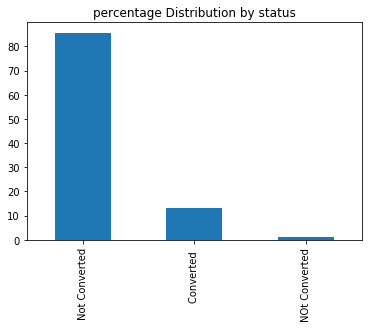

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline
print("percentage of default \n")
print(round(data_new.Status1.value_counts(normalize=True)*100,2))
round(data_new.Status1.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("percentage Distribution by status")
plt.show()

In [30]:
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
data_new.columns
data_new.head()

,Status1,Status_information
0,Not Converted,"14/8/prema: share me details, available in evn..."
1,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Converted,16|AuG|moHan:rnr
3,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [32]:
data_new.reset_index(inplace = True) 

In [33]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(data_new)):
    review = re.sub('[^a-zA-Z]', ' ', data_new['Status_information'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
corpus[1]

'prema cal tmrw share detail email prema share detail email check n revert prema receiv email look asq certif'

In [35]:
type(corpus)

list

In [36]:
data_new['Status1']=data_new['Status1'].str.lower()


E:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
data_new['Status1'].unique()

array(['not converted', 'converted '], dtype=object)

In [38]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)

Y=data_new['Status1']


In [39]:
pickle.dump(cv,open('transform_new.pkl','wb'))

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf=TfidfTransformer()

X=tfidf.fit_transform(X)

In [42]:
print(X.shape,Y.shape)

(974, 1018) (974,)


In [43]:
type(X)

scipy.sparse.csr.csr_matrix

In [45]:
pickle.dump(tfidf,open('transform.pkl','wb'))

In [46]:
ros = RandomOverSampler(random_state=0)
X_res,Y_res=ros.fit_resample(X, Y)

In [47]:
Y_res.value_counts(normalize=True) * 100

not converted    50.0
converted        50.0
Name: Status1, dtype: float64

In [48]:
Y_res=Y_res.replace(to_replace = ['converted ','not converted'], value = [0,1])

In [49]:
Y_res.value_counts(normalize=True) * 100

1    50.0
0    50.0
Name: Status1, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_res,Y_res, test_size = 0.1, random_state = 225)


In [51]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [52]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [53]:
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        92
           1       0.70      0.74      0.72        77

    accuracy                           0.73       169
   macro avg       0.73      0.73      0.73       169
weighted avg       0.74      0.73      0.73       169

[[67 25]
 [20 57]]


In [54]:
filename='nlp_model_new.pkl'
pickle.dump(clf,open(filename,'wb'))